## Tags

- Multi Classclasification
- Dimension Reduction [PCA]
- Accuracy, Precision, Recall, F1 Score
- Neural Network - Deep Learning using Tensorflow

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn



from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report




import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
tf.compat.v2.test.is_gpu_available(cuda_only=False,min_cuda_compute_capability=None)

False

In [3]:
## load data
data = pd.read_csv('data/mnist-in-csv/mnist_train.csv')
data_test = pd.read_csv('data/mnist-in-csv/mnist_test.csv')

In [4]:
## understand data - first overview
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
## Shuffle the data
data = shuffle(data)

In [6]:
## Shape of the data
print('Shape of the complete dataset: ',data.shape)

Shape of the complete dataset:  (60000, 785)


In [7]:
## Seperating Features and labels
y = data[['label']]
X = data.drop(['label'], axis = 1) 

In [8]:
## For Test Data
y_test = data_test[['label']]
X_test = data_test.drop(['label'], axis = 1) 

In [9]:
print('Shape of the Features: ', X.shape)
print('Shape of the Label: ', y.shape)

Shape of the Features:  (60000, 784)
Shape of the Label:  (60000, 1)


In [10]:
y.label.unique()

array([7, 0, 1, 2, 9, 6, 5, 3, 8, 4], dtype=int64)

### Data Analysis - First Level

- number of examples are arounf 60,000 which is good
- number of features seems to be on the higher side, we have to check how to work with that.
- we have in total 10 classes , one for each number for 0 to 9

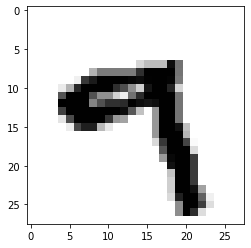

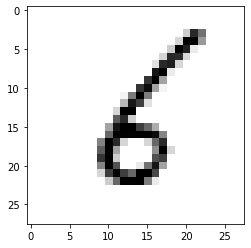

In [11]:
%matplotlib inline

some_digit = X.values[10].reshape(28,28)
plt.imshow(some_digit, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

some_digit = X.values[110].reshape(28,28)
plt.imshow(some_digit, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()


### Data Analysis - Second Level

- feature represent the 784 coloums which is binary of 28 * 28 image cell. 
- current image is the gray scale image.
- most the pixels are empty always , as small area is used for the representation of the number.

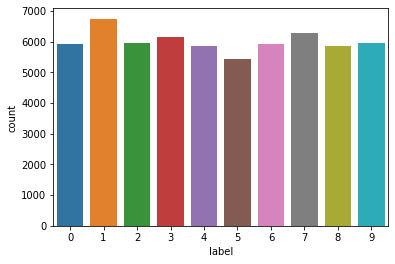

In [12]:
## to uderstand the data distribution of each class in the dataset
sn.countplot(x="label", data=y)

In [13]:
desc = X.describe()

In [14]:
desc.head(10)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


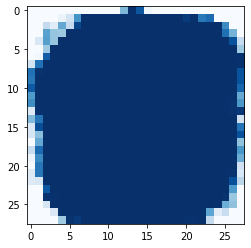

In [15]:
## As we can see , plotting the max value for each pixel , edges and boundaries never had any value.
plt.imshow(desc.values[7].reshape(28,28), cmap=matplotlib.cm.Blues, interpolation='nearest')

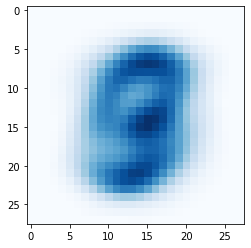

In [16]:
## As we can see , plotting the mean value for each pixel , edges and boundaries never had any value.
## mostly values are concentrated in the middle part of the iage only.
plt.imshow(desc.values[1].reshape(28,28), cmap=matplotlib.cm.Blues, interpolation='nearest')

### Data Analysis

- We have almost equal number of examples for each class.
- By seeing the graph of max and mean value at each pixel , we can confirm edges are almost never used , mostly data is concentrated in the middle only.

In [17]:
 X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
print('Shape of training features ', X_train.shape)
print('Shape of validation features ', X_val.shape)

print('Shape of training label', y_train.shape)
print('Shape of validation label', y_val.shape)

Shape of training features  (48000, 784)
Shape of validation features  (12000, 784)
Shape of training label (48000, 1)
Shape of validation label (12000, 1)


In [19]:
## scale the data, same scaler should be used for test data also
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
input_dimension = X_train.shape[1] # this represent number of features

### hyper parameters
epochs = 20
batch_size = 256

### model
model = Sequential()
model.add(Dense(256, input_shape=(input_dimension,), activation='relu', kernel_regularizer= tf.keras.regularizers.l1(0.001)))
model.add(Dense(126, activation='relu'))
model.add(Dense(54, activation='relu',kernel_regularizer= tf.keras.regularizers.l1(0.01)))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 126)               32382     
_________________________________________________________________
dense_2 (Dense)              (None, 54)                6858      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                550       
Total params: 240,750
Trainable params: 240,750
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train.values, epochs=epochs, batch_size=batch_size,
          validation_data=(X_val, y_val.values))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 73us/sample - loss: 2.3877 - accuracy: 0.8848 - val_loss: 1.4056 - val_accuracy: 0.9112
Epoch 2/20
48000/48000 [==============================] - 2s 35us/sample - loss: 1.3103 - accuracy: 0.9218 - val_loss: 1.1717 - val_accuracy: 0.9263
Epoch 3/20
48000/48000 [==============================] - 2s 40us/sample - loss: 1.1607 - accuracy: 0.9283 - val_loss: 1.2972 - val_accuracy: 0.9240
Epoch 4/20
48000/48000 [==============================] - 2s 40us/sample - loss: 1.1959 - accuracy: 0.9306 - val_loss: 1.1689 - val_accuracy: 0.9333
Epoch 5/20
48000/48000 [==============================] - 2s 35us/sample - loss: 1.1492 - accuracy: 0.9330 - val_loss: 1.0793 - val_accuracy: 0.9381
Epoch 6/20
48000/48000 [==============================] - 2s 35us/sample - loss: 1.1257 - accuracy: 0.9333 - val_loss: 1.1650 - val_accuracy: 0.9327
Epoch 7/20
48000/48000 [==============================] 

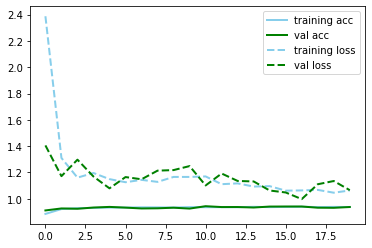

In [23]:
plt.plot( history.history['accuracy'], color='skyblue', linewidth=2, label='training acc')
plt.plot( history.history['val_accuracy'], color='green', linewidth=2, label='val acc')

plt.plot( history.history['loss'], color='skyblue', linewidth=2, linestyle='dashed', label="training loss")
plt.plot( history.history['val_loss'], color='green', linewidth=2, linestyle='dashed', label="val loss")
plt.legend()


### Understand the affect of Change in learning rate
- We will try to change the batch size , and understand the affect on model.

In [24]:
input_dimension = X_train.shape[1] # this represent number of features

### hyper parameters
epochs = 20
batch_size = 256

### model
model = Sequential()
model.add(Dense(256, input_shape=(input_dimension,), activation='relu', kernel_regularizer= tf.keras.regularizers.l1(0.001)))
model.add(Dense(126, activation='relu'))
model.add(Dense(54, activation='relu',kernel_regularizer= tf.keras.regularizers.l1(0.001)))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 126)               32382     
_________________________________________________________________
dense_6 (Dense)              (None, 54)                6858      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                550       
Total params: 240,750
Trainable params: 240,750
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_train, y_train.values, epochs=epochs, batch_size=batch_size,
          validation_data=(X_val, y_val.values))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 75us/sample - loss: 3.1476 - accuracy: 0.8984 - val_loss: 1.0308 - val_accuracy: 0.9370
Epoch 2/20
48000/48000 [==============================] - 2s 49us/sample - loss: 0.8884 - accuracy: 0.9418 - val_loss: 0.7694 - val_accuracy: 0.9451
Epoch 3/20
48000/48000 [==============================] - 2s 45us/sample - loss: 0.6936 - accuracy: 0.9509 - val_loss: 0.6388 - val_accuracy: 0.9585
Epoch 4/20
48000/48000 [==============================] - 2s 37us/sample - loss: 0.5971 - accuracy: 0.9566 - val_loss: 0.5793 - val_accuracy: 0.9562
Epoch 5/20
48000/48000 [==============================] - 2s 42us/sample - loss: 0.5181 - accuracy: 0.9604 - val_loss: 0.5260 - val_accuracy: 0.9603
Epoch 6/20
48000/48000 [==============================] - 2s 39us/sample - loss: 0.4809 - accuracy: 0.9616 - val_loss: 0.4805 - val_accuracy: 0.9611
Epoch 7/20
48000/48000 [==============================] 

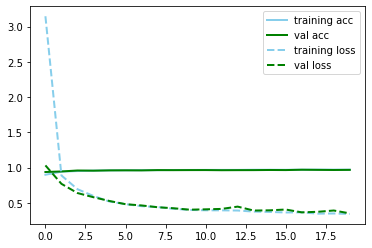

In [26]:
plt.plot( history.history['accuracy'], color='skyblue', linewidth=2, label='training acc')
plt.plot( history.history['val_accuracy'], color='green', linewidth=2, label='val acc')

plt.plot( history.history['loss'], color='skyblue', linewidth=2, linestyle='dashed', label="training loss")
plt.plot( history.history['val_loss'], color='green', linewidth=2, linestyle='dashed', label="val loss")
plt.legend()

As can be seen in the first examples the loss curve is not smooth, so it make sense to ower the learning rate a bit to have a better result , As we can see lowering the learning rate not only help us to get the smooth loss curve , but the owerall accuracy was also improved.

In [27]:
y_test_pred = model.predict_classes(X_test)

In [28]:
print('Shape of predicction ', y_test_pred.shape)
print('Shape of test ', y_test.shape)

Shape of predicction  (10000,)
Shape of test  (10000, 1)


In [29]:
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)

[[ 967    1    2    0    0    2    3    1    2    2]
 [   0 1127    3    1    0    1    3    0    0    0]
 [   4    3 1004    3    2    0    4    7    4    1]
 [   2    0    6  972    0   10    0    7   10    3]
 [   1    4    5    0  940    1    9    3    2   17]
 [   2    2    0   10    0  867    6    2    2    1]
 [   5    3    0    0    2   10  934    0    4    0]
 [   2   12   14    2    3    2    0  981    0   12]
 [   7    7    3    3    1   10   10    6  923    4]
 [   4    5    0    6    9    5    1    8    2  969]]


In [30]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.95      0.97      0.96       892
           6       0.96      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



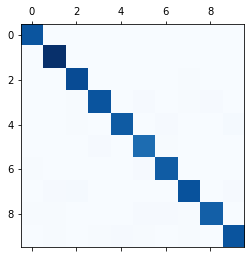

In [31]:
## Dark color represent the correctness of classification
plt.matshow(conf_mat , cmap = plt.cm.Blues)

In [32]:
## TO ca;culate the error rate , sum instance of each class and than divide it
row_sum = conf_mat.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mat/ row_sum

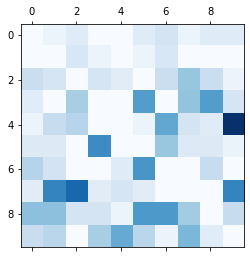

In [33]:
## Dark color represent the higher error
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap = plt.cm.Blues)

### Understand the feature reduction 


In [34]:
pca = PCA(n_components=512)
X_train = pca.fit_transform(X_train)

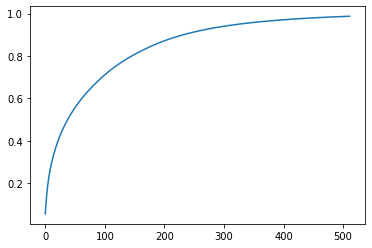

In [35]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [36]:
print('Shape of input after PCA', X_train.shape)

Shape of input after PCA (48000, 512)


In [37]:
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)


In [38]:

### hyper parameters
input_dimension = X_train.shape[1] # this represent number of features
epochs = 20
batch_size = 256

### model
model = Sequential()
model.add(Dense(256, input_shape=(input_dimension,), activation='relu', kernel_regularizer= tf.keras.regularizers.l1(0.001)))
model.add(Dense(126, activation='relu'))
model.add(Dense(54, activation='relu',kernel_regularizer= tf.keras.regularizers.l1(0.001)))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 126)               32382     
_________________________________________________________________
dense_10 (Dense)             (None, 54)                6858      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                550       
Total params: 171,118
Trainable params: 171,118
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(X_train, y_train.values, epochs=epochs, batch_size=batch_size,
          validation_data=(X_val, y_val.values))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 46us/sample - loss: 3.0901 - accuracy: 0.8737 - val_loss: 1.2100 - val_accuracy: 0.9468
Epoch 2/20
48000/48000 [==============================] - 1s 30us/sample - loss: 0.8996 - accuracy: 0.9468 - val_loss: 0.7349 - val_accuracy: 0.9518
Epoch 3/20
48000/48000 [==============================] - 1s 30us/sample - loss: 0.6493 - accuracy: 0.9511 - val_loss: 0.6419 - val_accuracy: 0.9516
Epoch 4/20
48000/48000 [==============================] - 1s 30us/sample - loss: 0.5949 - accuracy: 0.9554 - val_loss: 0.5877 - val_accuracy: 0.9551
Epoch 5/20
48000/48000 [==============================] - 1s 30us/sample - loss: 0.5021 - accuracy: 0.9587 - val_loss: 0.5038 - val_accuracy: 0.9585
Epoch 6/20
48000/48000 [==============================] - 2s 32us/sample - loss: 0.4823 - accuracy: 0.9596 - val_loss: 0.4650 - val_accuracy: 0.9597
Epoch 7/20
48000/48000 [==============================] 

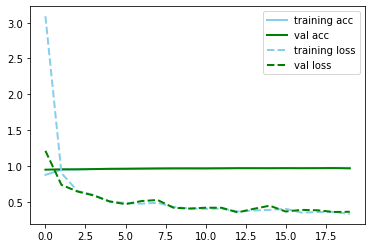

In [40]:
plt.plot( history.history['accuracy'], color='skyblue', linewidth=2, label='training acc')
plt.plot( history.history['val_accuracy'], color='green', linewidth=2, label='val acc')

plt.plot( history.history['loss'], color='skyblue', linewidth=2, linestyle='dashed', label="training loss")
plt.plot( history.history['val_loss'], color='green', linewidth=2, linestyle='dashed', label="val loss")
plt.legend()

In [41]:
y_test_pred = model.predict_classes(X_test)

In [42]:
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)

[[ 972    0    0    0    1    0    1    1    3    2]
 [   0 1122    5    2    0    0    3    0    3    0]
 [   4    2 1006    3    1    0    2    4   10    0]
 [   0    0    8  976    1    5    0    7    7    6]
 [   0    0    7    1  909    1    3    4    1   56]
 [   5    1    2   16    2  845    6    0    9    6]
 [   9    2    4    0    5    5  926    0    7    0]
 [   2    9   14    3    1    0    0  971    1   27]
 [   4    0    4    6    4    6    1    2  942    5]
 [   2    3    1    7    3    5    0    6    3  979]]


In [43]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.93      0.95       982
           5       0.97      0.95      0.96       892
           6       0.98      0.97      0.97       958
           7       0.98      0.94      0.96      1028
           8       0.96      0.97      0.96       974
           9       0.91      0.97      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.97      0.96      0.96     10000



#### Note : Model with PCA executed comparatively faster as without it. With PCA we may even chose smaller model since the number if inputs have decreased. Now lets use the data augmentation to increase the data set and achive better numbers. Since CNN perform better with image , next step should be to perform Classification on images using CNN acheive more than 97 % accuracy.